In [252]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from ucimlrepo import fetch_ucirepo  

In [253]:
mushroom = fetch_ucirepo(id=73) 

X = mushroom.data.features 
y = mushroom.data.targets

df = X.join(y)
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [254]:
print(df.shape)
df.nunique()

(8124, 23)


cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   4
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
poisonous                    2
dtype: int64

In [255]:
df_c = df.copy().dropna()
print(df_c.shape)
df_c.nunique()

(5644, 23)


cap-shape                   6
cap-surface                 4
cap-color                   8
bruises                     2
odor                        7
gill-attachment             2
gill-spacing                2
gill-size                   2
gill-color                  9
stalk-shape                 2
stalk-root                  4
stalk-surface-above-ring    4
stalk-surface-below-ring    4
stalk-color-above-ring      7
stalk-color-below-ring      7
veil-type                   1
veil-color                  2
ring-number                 3
ring-type                   4
spore-print-color           6
population                  6
habitat                     6
poisonous                   2
dtype: int64

In [256]:
df = df.drop(columns=['veil-type'])

In [257]:
le = LabelEncoder()
df_le = df.copy()
for col in df.columns:
    df_le[col] = le.fit_transform(df_le[col])
    
df_le.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,2,1,0,3,0,1,0


<Axes: >

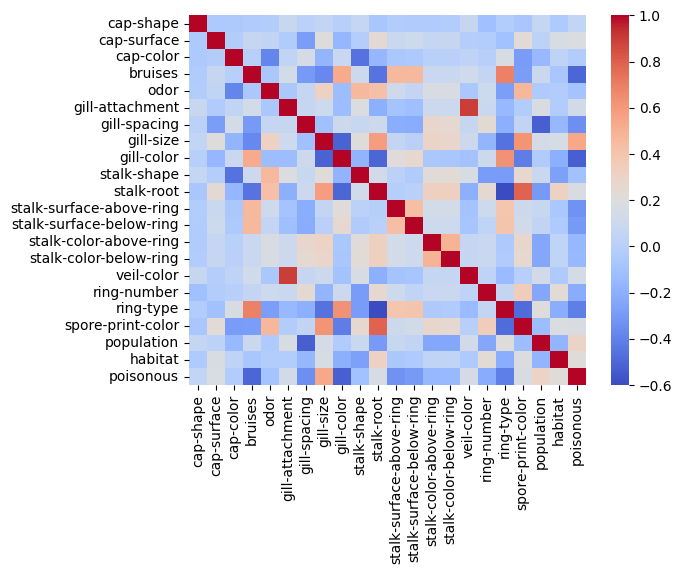

In [258]:
sns.heatmap(df_le.corr(), cmap='coolwarm')

In [259]:
df_ohe = pd.get_dummies(df.copy(), drop_first=True)

df_ohe.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,poisonous_p
0,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,True
1,False,False,False,False,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,True
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


<Axes: >

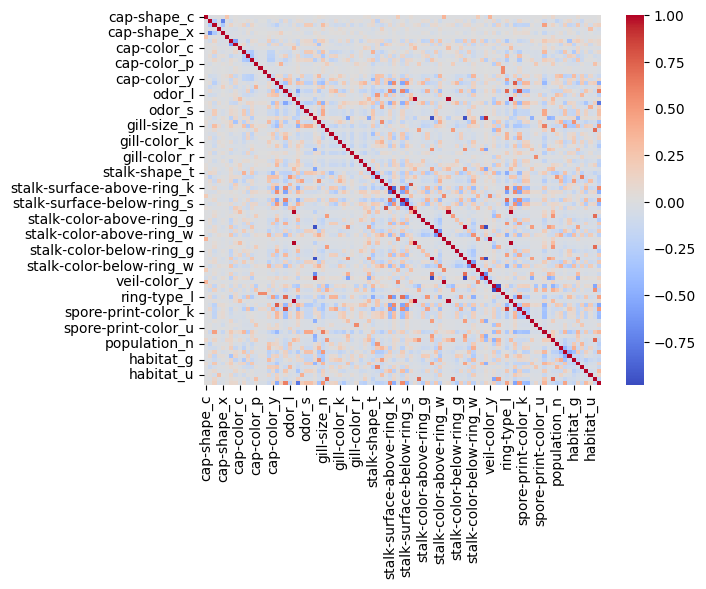

In [260]:
sns.heatmap(df_ohe.corr(), cmap='coolwarm')

In [261]:
df_le = df_le.astype(int)

X = df_le.iloc[:, :-1]
y = df_le.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [262]:
import sys
import os

if '__file__' in globals():
    parent_dir = os.path.abspath(os.path.join(os.path.dirname(__file__), '..'))
else:
    parent_dir = os.getcwd()
sys.path.insert(0, parent_dir)

from lib.OneRule import OneRuleClassifier
from lib.NaiveBayes import NaiveBayesClassifier
from lib.DecisionTree import DecisionTreeClassifier
from lib.KNN import KNNClassifier

from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.neighbors import KNeighborsClassifier

In [263]:
classifiers = [(OneRuleClassifier(), '1R-my'),
        (NaiveBayesClassifier(), 'NB-my'),
        (CategoricalNB(), 'NB'),
        (DecisionTreeClassifier(), 'DT-my'),
        (DT(), 'DT'),
        (KNNClassifier(k=3, weights=False), 'KNN-my'),
        (KNeighborsClassifier(n_neighbors=3, weights=None), 'KNN')]

fit_times = []
predict_times = []
accuracies = []
names = []

In [264]:
for (clf, name) in classifiers:
    start_fit = time.time()
    clf.fit(X_train, y_train)
    end_fit = time.time()
    
    start_pred = time.time()
    y_pred = clf.predict(X_test)
    end_pred = time.time()
    
    accuracy1 = accuracy_score(np.array(y_test), np.array(y_pred))
    
    fit_times.append(end_fit - start_fit)
    predict_times.append(end_pred - start_pred)
    accuracies.append(accuracy1)
    names.append(name)
    
    print(f"Model {name} | Accuracy: {accuracy1:.4f} | Fit Time: {fit_times[-1]:.4f}s | Predict Time: {predict_times[-1]:.4f}s")

Model 1R-my | Accuracy: 0.9846 | Fit Time: 0.0144s | Predict Time: 0.0065s
Model NB-my | Accuracy: 0.9809 | Fit Time: 0.0058s | Predict Time: 0.0251s
Model NB | Accuracy: 0.9508 | Fit Time: 0.0023s | Predict Time: 0.0006s
Model DT-my | Accuracy: 1.0000 | Fit Time: 0.0844s | Predict Time: 0.0058s
Model DT | Accuracy: 1.0000 | Fit Time: 0.0042s | Predict Time: 0.0005s
Model KNN-my | Accuracy: 0.9982 | Fit Time: 0.0000s | Predict Time: 195.4996s
Model KNN | Accuracy: 0.9982 | Fit Time: 0.0013s | Predict Time: 0.0766s


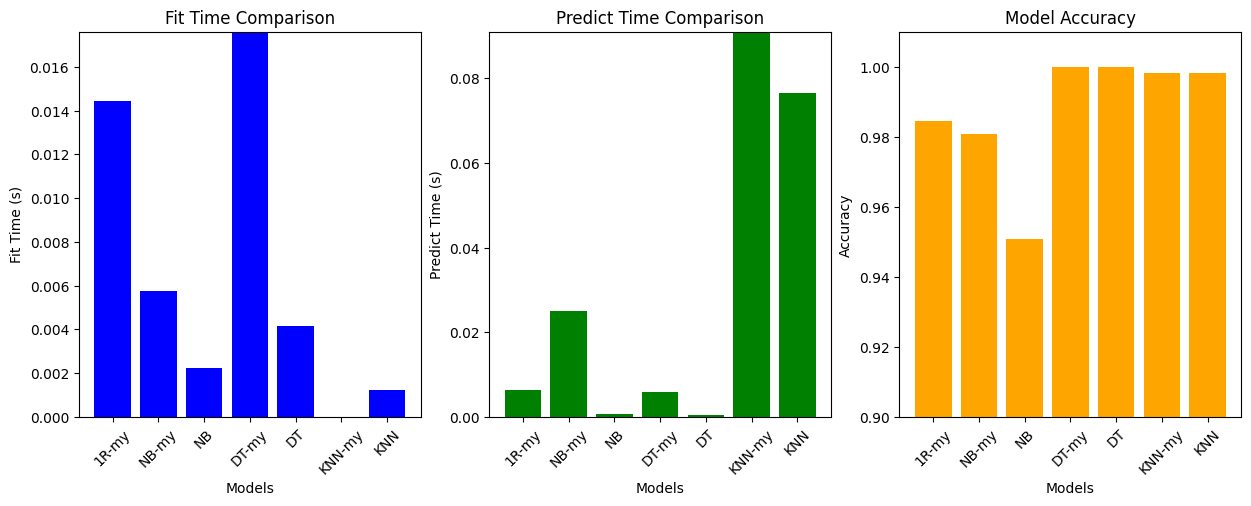

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(names, fit_times, color='blue')
plt.xlabel("Models")
plt.ylabel("Fit Time (s)")
plt.title("Fit Time Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 0.0176)

plt.subplot(1, 3, 2)
plt.bar(names, predict_times, color='green')
plt.xlabel("Models")
plt.ylabel("Predict Time (s)")
plt.title("Predict Time Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 0.091)

plt.subplot(1, 3, 3)
plt.bar(names, accuracies, color='orange')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.xticks(rotation=45)
plt.ylim(0.9, 1.01)

plt.show()

In [266]:
df_ohe = df_ohe.astype(int)

X = df_ohe.iloc[:, :-1]
y = df_ohe.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [267]:
classifiers = [(OneRuleClassifier(), '1R-my'),
        (NaiveBayesClassifier(), 'NB-my'),
        (CategoricalNB(), 'NB'),
        (DecisionTreeClassifier(), 'DT-my'),
        (DT(), 'DT'),
        (KNNClassifier(k=3, weights=False), 'KNN-my'),
        (KNeighborsClassifier(n_neighbors=3, weights=None), 'KNN')]

fit_times = []
predict_times = []
accuracies = []
names = []

In [268]:
for (clf, name) in classifiers:
    start_fit = time.time()
    clf.fit(X_train, y_train)
    end_fit = time.time()
    
    start_pred = time.time()
    y_pred = clf.predict(X_test)
    end_pred = time.time()
    
    accuracy1 = accuracy_score(np.array(y_test), np.array(y_pred))
    
    fit_times.append(end_fit - start_fit)
    predict_times.append(end_pred - start_pred)
    accuracies.append(accuracy1)
    names.append(name)
    
    print(f"Model {name} | Accuracy: {accuracy1:.4f} | Fit Time: {fit_times[-1]:.4f}s | Predict Time: {predict_times[-1]:.4f}s")

Model 1R-my | Accuracy: 0.8782 | Fit Time: 0.0705s | Predict Time: 0.0061s
Model NB-my | Accuracy: 0.9545 | Fit Time: 0.0180s | Predict Time: 0.0630s
Model NB | Accuracy: 0.9391 | Fit Time: 0.0061s | Predict Time: 0.0018s
Model DT-my | Accuracy: 1.0000 | Fit Time: 0.3858s | Predict Time: 0.0102s
Model DT | Accuracy: 1.0000 | Fit Time: 0.0090s | Predict Time: 0.0009s
Model KNN-my | Accuracy: 1.0000 | Fit Time: 0.0000s | Predict Time: 203.9113s
Model KNN | Accuracy: 1.0000 | Fit Time: 0.0021s | Predict Time: 0.0804s


(0.9, 1.01)

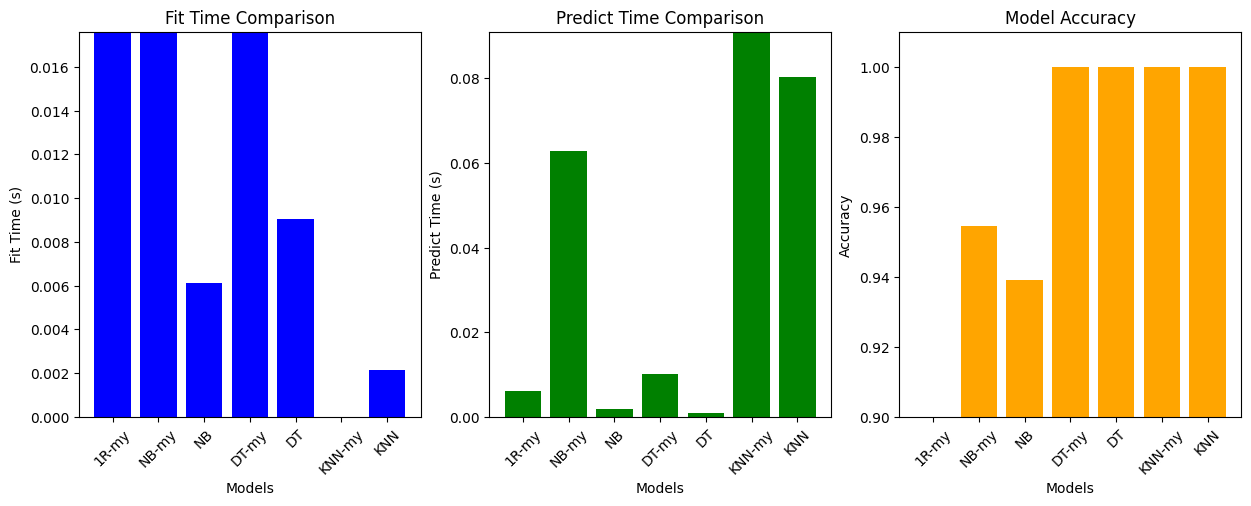

In [269]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(names, fit_times, color='blue')
plt.xlabel("Models")
plt.ylabel("Fit Time (s)")
plt.title("Fit Time Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 0.0176)

plt.subplot(1, 3, 2)
plt.bar(names, predict_times, color='green')
plt.xlabel("Models")
plt.ylabel("Predict Time (s)")
plt.title("Predict Time Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 0.091)

plt.subplot(1, 3, 3)
plt.bar(names, accuracies, color='orange')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.xticks(rotation=45)
plt.ylim(0.9, 1.01)
